# Assignment: kNN classifier

In this assignment we needed to import breast cancer dataset from [https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) and build classifier using knn algorithm to predict binary valued target "Diagnosis" in the data. We also needed to measure performance of the classifier and report it.

- First we investigated dataset to be sure what we are dealing with.

- We applied standardization to numerical values.

- We decided to use split valuation and extracted 30 present of the data to be used in validation.

- We trained classifier to predict cancer diagnosis malignant / benign. And tried different hyperparameters.

- We tested the performance of the classifier and displayed confusion matrix with common evaluation metrics.



In [34]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Standardize data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Extract part of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.Diagnosis, test_size=0.3, random_state=123)

# Create a kNN classifier
# n_neighbors parameter specifies the number of neighbors to use (k)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the kNN classifier on the training data
knn.fit(X_train, y_train)

# Use the trained classifier to predict labels for the test set
y_pred_test = knn.predict(X_test)

# Calculate and print the accuracy of the classifier on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.3f}")

Accuracy of kNN classifier on the test set: 0.982


### Findings

k = 1:
- Accuracy of kNN classifier on the test set: 0.959

k = 3:
- Accuracy of kNN classifier on the test set: 0.982

k = 5:
- Accuracy of kNN classifier on the test set: 0.977

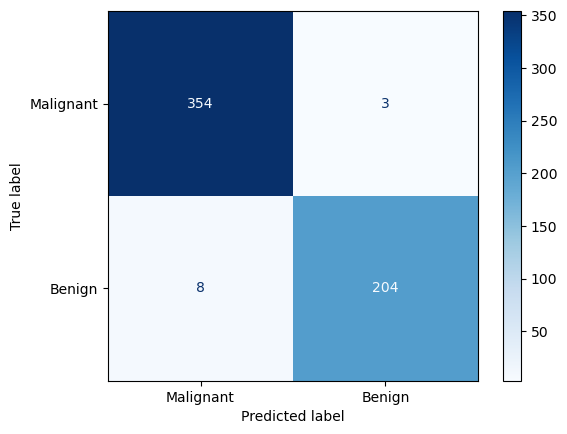

In [35]:
# Now, for the confusion matrix and plot
y_pred = knn.predict(X_scaled)  # Use the full scaled data to make predictions

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

# Create a confusion matrix display
cmd = ConfusionMatrixDisplay(cm, display_labels=['Malignant', 'Benign'])

# Plot confusion matrix
cmd.plot(cmap='Blues')

### Evaluation metrics

### Accuracy

Calculation formula for accuracy is:

$$
\frac{TP+TN}{TP+FP+FN+TN}
$$

In [44]:
# Calculation done with formula

print(f"Accuracy of model: {((TP + TN) / (TP + FP + FN + TN)) * 100:.2f}%")

0.98
Accuracy of model: 98.07%


### Precision

Calculation formula for precision is:

$$
\frac{TP}{TP+FP}
$$

In [38]:
from sklearn.metrics import precision_score

# Calculation done for both class by imported precision function from sklearn metrics

precision_malignant = precision_score(y, y_pred, pos_label='M')
precision_benign = precision_score(y, y_pred, pos_label='B')

print(f"Precision of malignant: {precision_malignant * 100:.2f}%\n")
print(f"Precision of benign: {precision_benign * 100:.2f}%")

Precision of malignant: 98.55%
Precision of benign: 97.79%


### Recall

Calculation formula for recall is:

$$
\frac{TP}{TP+FN}
$$

In [42]:
# Calculation done for both malignant and benign with imported recall_score function

m_recall = recall_score(y, y_pred, pos_label="M")
b_recall = recall_score(y, y_pred, pos_label="B")
print(f"Recall of malignant: {m_recall * 100:.2f}%\n")
print(f"Recall of benign: {b_recall * 100:.2f}%")



Recall of malignant: 96.23%

Recall of benign: 99.16%
